__Exponential smoothing__ models are based on a description of the trend and seasonality in the data.
__ARIMA__ models aim to describe the autocorrelations in the data.

## 8.1 Stationarity and differencing

A stationary time series is one whose properties do not depend on the time at which the series is observed.

Not Stationary:
    Trend and Seasonal series
Stationary : 
    White Noise
    time series with cyclic behaviour ( but with no trend or seasonality)
    
An important visual tool:
A stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

In [1]:
from PIL import Image

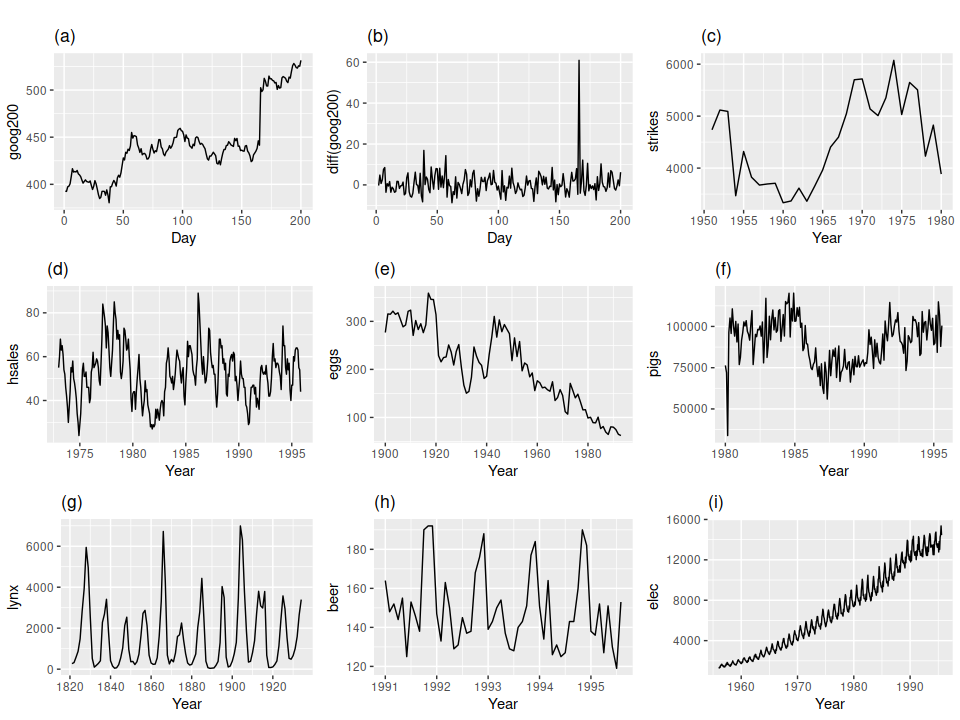

In [2]:
Image.open("./data/stationary-1.png")

In [3]:
# of these only b, g are stationary
# f can be thought of as comprising of small tend series

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./data/DJI.csv",index_col='Date',parse_dates=True)

In [5]:
data['delta_close'] = data.Close.diff()
data = data.query("index>2015 & index<2020")

Text(0.5, 0.95, 'DJI Index')

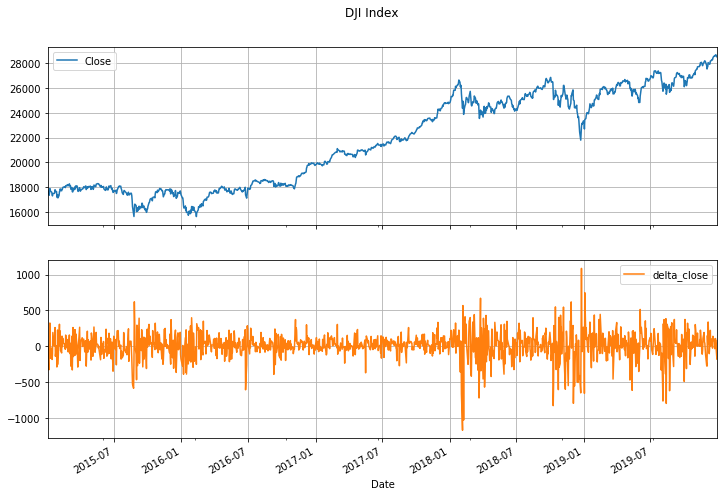

In [6]:
data[['Close','delta_close']].plot(subplots=True,grid=True,figsize=(12,8))
plt.suptitle("DJI Index",y=.95)

__Differencing__ is the first choice for converting a time series to stationary series.
As evident from the above example, a visual inspection of delta of close ( i.e. diff on 
close) is much more stable ( although variance might by changing hard to gauge from
visual inspection) but clearly level "close" is trending series.

In [7]:
from pandas.plotting import autocorrelation_plot

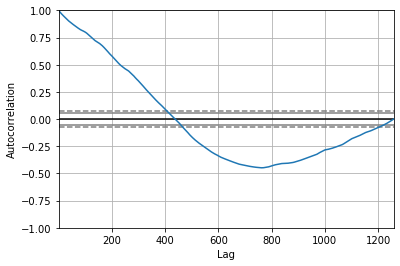

In [8]:
autocorrelation_plot(data['Close'])
# strong trend in the series suggested!

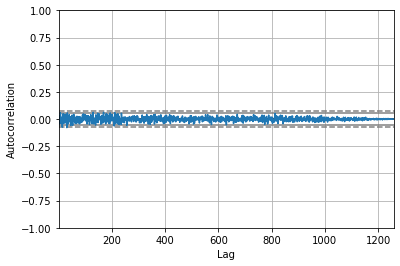

In [9]:
autocorrelation_plot(data['delta_close'].dropna())
# In a stationary series auto - correlation drops to zero immediately
# first order differencing is very effective

In [10]:
from statsmodels.stats.diagnostic import acorr_ljungbox
_ , p_close = acorr_ljungbox(data['Close'], lags=10)

_,p_delta_close = acorr_ljungbox(data['delta_close'].dropna(), lags=10)
pd.np.round(pd.DataFrame({"Close":p_close,"delta_close":p_delta_close},index=range(1,len(p_delta_close)+1)),2)

C:\Users\91882\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


,Close,delta_close
1,0.0,0.53
2,0.0,0.22
3,0.0,0.25
4,0.0,0.22
5,0.0,0.18
6,0.0,0.26
7,0.0,0.10
8,0.0,0.09
9,0.0,0.12
10,0.0,0.14


Ljung-Box test : 
We clearly see the box-ljung test for both the series clearly shows
that the autocorrelation for level (close) series is non-zero , 
i.e. ts in this form has  auto-correlation exists . While the
differened series has not auto-correlation ( null hypothesis) 
for Ljung-Box test is not rejected.
 
__note__ : the test makes sense for the model residuals
https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html

In [11]:
# Transformations such as logarithms can help to stabilise the variance of a time series.

In [12]:
data['delta_volume'] = data['Volume'].diff()

Text(0.5, 0.95, 'DJI - Volume')

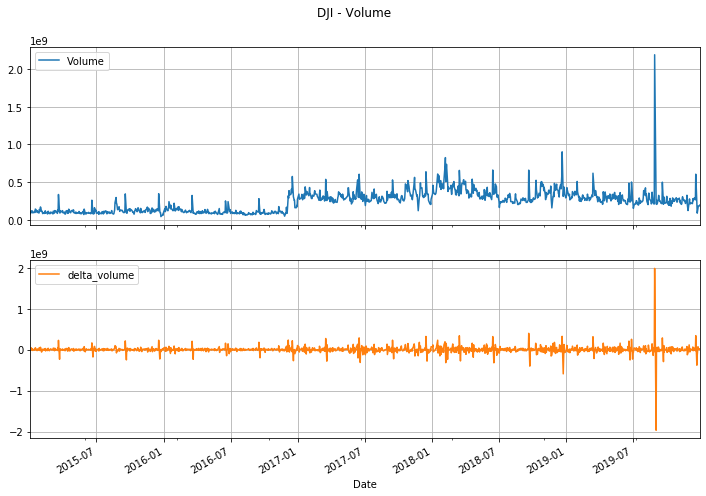

In [13]:
data[['Volume','delta_volume']].plot(subplots=True,grid=True,figsize=(12,8))
plt.suptitle("DJI - Volume",y=0.95)

In [14]:
_ , p_volume = acorr_ljungbox(data['Volume'], lags=10)
_,p_delta_volume = acorr_ljungbox(data['delta_volume'].dropna(), lags=10)
pd.np.round(pd.DataFrame({"Volume":p_volume,"delta_volume":p_delta_volume},index=range(1,len(p_delta_close)+1)),2)
# null hypothesis for Ljung Box test rejects is rejected 
# for delta volume, so there is auto-regressive property exits for the volume

,Volume,delta_volume
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0
10,0.0,0.0


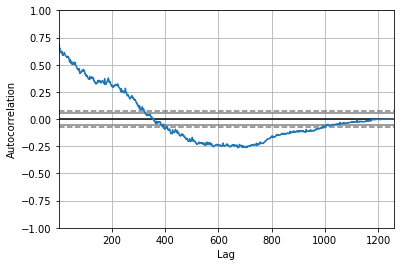

In [15]:
autocorrelation_plot(data['Volume'])

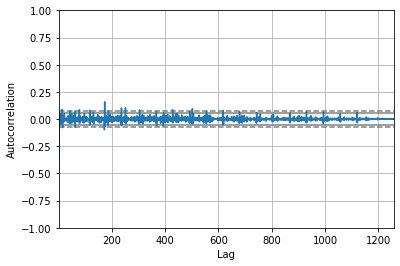

In [16]:
autocorrelation_plot(data['delta_volume'].dropna())

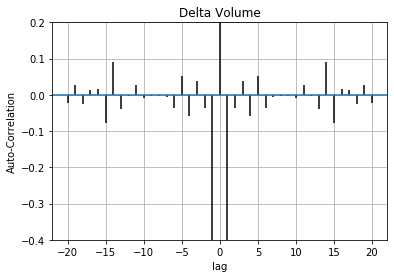

In [17]:
ax = plt.gca()
plt.acorr(data['delta_volume'].dropna(), maxlags=20)
plt.ylim([-.4,.2])
ax.set(title='Delta Volume',ylabel='Auto-Correlation',xlabel='lag')
ax.grid(True)

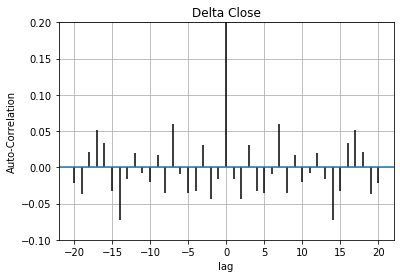

In [18]:
ax = plt.gca()
plt.acorr(data['delta_close'],maxlags=20)
plt.ylim([-.1,.2])
ax.set(title='Delta Close',ylabel='Auto-Correlation',xlabel='lag')
ax.grid(True)

In [19]:
log_vol = pd.np.log(data['Volume'])

In [20]:
delta_log_vol = log_vol.diff().dropna()

In [21]:
acorr_ljungbox(delta_log_vol,lags=10,return_df=True)

,lb_stat,lb_pvalue
1,211.083095,7.972013e-48
2,213.654512,4.031924e-47
3,216.708561,1.033243e-46
4,229.824949,1.439715e-48
5,237.719297,2.367528e-49
6,239.501863,7.171533e-49
7,239.919698,3.865290e-48
8,239.928936,2.344257e-47
9,239.936592,1.325160e-46
10,239.938722,7.057304e-46


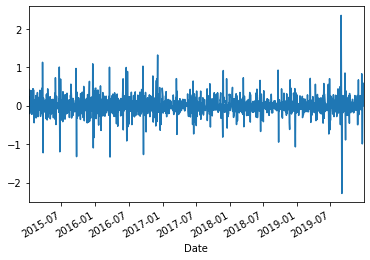

In [22]:
delta_log_vol.plot()

__Note__: delta of log volume might look, that it is stationary but it is not

# Random Walk model
The differenced series is the change between consecutive observations in the original series, and can be written as

$$y_t^{'} = y_t - y_{t-1}$$ 

When the differenced series is white noise, the model for the original series can be written as,

$$y_t - y_{t-1} = \epsilon_t$$ 
where  $\epsilon_t$ denotes white noise. Rearranging this leads to the “random walk” model 
$$y_t = y_{t+1} = \epsilon_t$$ 

Random walk models are widely used for non-stationary data, particularly financial and economic data. Random walks typically have: __long periods of apparent trends up or down__ sudden and unpredictable changes in direction.
The forecasts from a random walk model are equal to the last observation, as future movements are unpredictable, and are equally likely to be up or down.

# Second-order differencing

Occasionally the differenced data will not appear to be stationary and it may be necessary to difference the data a second time to obtain a stationary series:

$$y_t^{"} = y_t^{'} - y_{t-1}^{'}\\
= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
= y_t - 2y_{t-1} + y_{t+2}
$$

It is unlikely, one would need more order of differencing.
Even to decide one would need 2-nd order differencing or 
change the premise of model assumptions. Is not very clear

# Seasonal - differencing

A seasonal difference is the difference between an observation and the previous observation from the same season. So
$$y_t^{'} = y_t - y_{t-m}$$ 
where  m = the number of seasons. These are also called “lag-m differences”, as we subtract the observation after a lag of  m 
periods. 
If seasonally differenced data appear to be white noise, then an appropriate model for the original data is
$$y_t = y_{t-m} + \epsilon_t$$  
Forecasts from this model are equal to the last observation from the relevant season.

In [23]:
from utils.ease import convert_r_dataframe_to_python

In [24]:
a10 = pd.read_csv("./data/a10.csv",usecols=['time','value'])
a10 = convert_r_dataframe_to_python(a10);a10.set_index("date",inplace=True);

In [25]:
from utils import cplot

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23db52c2b70>)

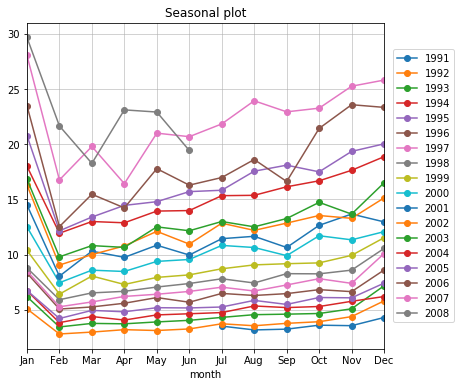

In [26]:
cplot.seasonal(a10,'value') 
# there appears to be seasonality

Text(0.5, 0.92, 'Antidiabetic drug sales')

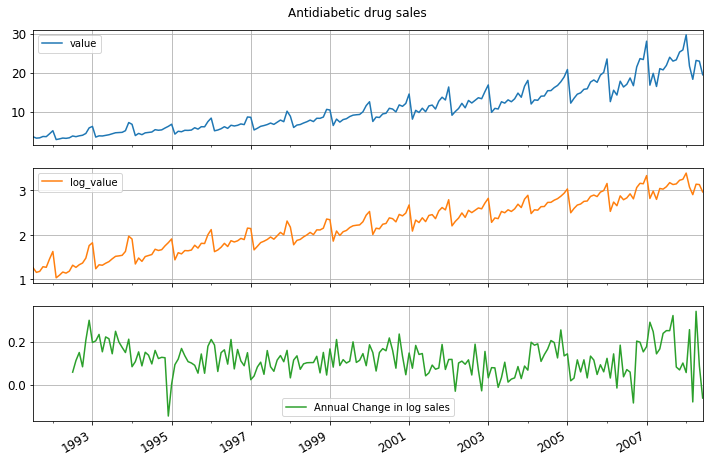

In [27]:
a10['log_value'] = pd.np.log(a10['value'])
a10['Annual Change in log sales'] = a10['log_value'].diff(12)
a10.plot(subplots=True,grid=True,figsize=(12,8),fontsize=12)
plt.xlabel("")
plt.suptitle("Antidiabetic drug sales",y=.92)

In [28]:
usmelec = pd.read_csv("./data/usmelec.csv")
usmelec = convert_r_dataframe_to_python(usmelec).set_index("date")[['value']]

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23db3f58860>)

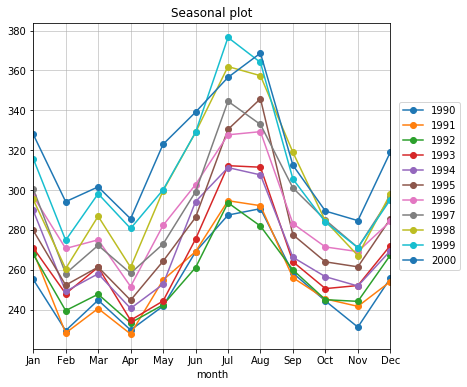

In [29]:
cplot.seasonal(usmelec.loc['1990':'2000'],'value')

In [30]:
# A very Nice Seasonality exists!

In [31]:
# Taking log
usmelec['log'] = pd.np.log(usmelec['value'])
# First DIfferentiaion : Seasonal Differencing (log values difference lagged by 12)
usmelec['seasonality_differencing'] = usmelec['log'].diff(12)
# Second Differentiaion : diff(Seasonal Differencial)  
usmelec['doubly_differencing'] = usmelec['seasonality_differencing'] .diff()

Text(0.5, 0.95, 'Monthly US net electricity generation')

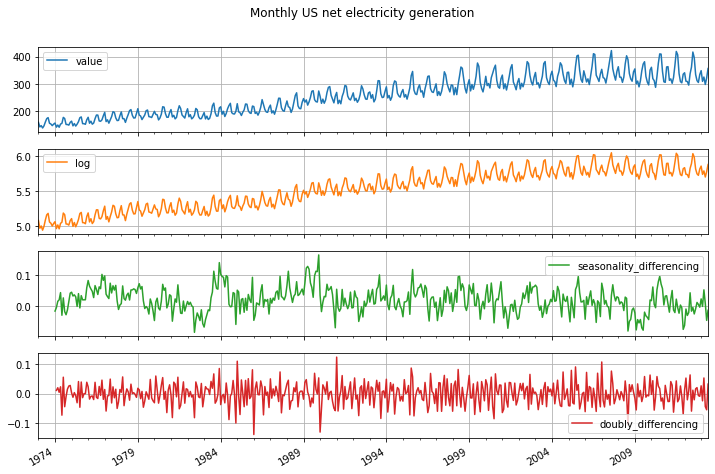

In [32]:
_ = usmelec.plot(subplots=True,grid=True,figsize=(12,8))
plt.xlabel("")
plt.suptitle("Monthly US net electricity generation",y=.95)

### order of apply Differentiation
When both seasonal and first differences are applied, it makes no difference which is done first—the result will be the same. However, if the data have a strong seasonal pattern, we recommend that __seasonal differencing be done first__, because the resulting series will sometimes be stationary and there will be no need for a further first difference. If first differencing is done first, there will still be seasonality present.

It is important that if differencing is used, the differences are interpretable. First differences are the change between one observation and the next. Seasonal differences are the change between one year to the next. Other lags are unlikely to make much interpretable sense and should be avoided.

# Unit root tests
One way to determine more objectively whether differencing is required is to use a unit root test. These are statistical hypothesis tests of stationarity that are designed for determining whether differencing is required.
A number of unit root tests are available, which are based on different assumptions and may lead to conflicting answers. 
- the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test (Kwiatkowski, Phillips, Schmidt, & Shin, 1992). In this test, the null hypothesis is that the data are stationary, and we look for evidence that the null hypothesis is false.
- Augmented Dickey Fuller test (ADH Test) - Null Hypothesis ( unit root exists, i.e. the series can be further decomposed , i.e. alternative hypothesis implies stationarity
- Philips Perron test (PP Test)

https://www.statsmodels.org/stable/tsa.html

In [33]:
from statsmodels.tsa import stattools

In [34]:
print("Available functions/tests in the module",stattools.__all__)

Available functions/tests in the module ['acovf', 'acf', 'pacf', 'pacf_yw', 'pacf_ols', 'ccovf', 'ccf', 'periodogram', 'q_stat', 'coint', 'arma_order_select_ic', 'adfuller', 'kpss', 'bds', 'pacf_burg', 'innovations_algo', 'innovations_filter', 'levinson_durbin_pacf', 'levinson_durbin', 'zivot_andrews']


In [35]:
stattools.kpss(data['delta_close']) 
# Null Hypothesis is not rejected - 
## series is stationary

C:\Users\91882\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\91882\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.10793976425531664,
 0.1,
 23,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [36]:
stattools.kpss(data['Close'])
# Null Hypothesis is rejected - 
## series is not stationary

C:\Users\91882\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(5.120303187323985,
 0.01,
 23,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [37]:
stattools.adfuller(data['delta_close'])
# ADF Null hypothesis is unit root exist i.e. non stationary
# here t > tcritical 
# null hypothesis is rejected
# unit root does not exist
# series is stationary
# All unit tests could be added in a single function

(-26.479691571652353,
 0.0,
 1,
 1256,
 {'1%': -3.4355671297788666,
  '5%': -2.8638438984080117,
  '10%': -2.5679966213893057},
 16398.47533197974)

## 8.2 Backshift notation

The backward shift operator  $B$ is a useful notational device when working with time series lags: $$By_t = y_{t-1}$$ , (Some references use $L$ for “lag” instead of  $B$ for “backshift”.)

In other words, $B$, operating on $y_t$, has the effect of shifting the data back one period. Two applications of $B$ to $y_t$ shifts the data back two periods:
 $$B(By_t) = B^2y_t= y_{t-2}$$
 
For monthly data, if we wish to consider “the same month last year,” the notation is  $$B^{12}y_t = y_{t-12}$$

For example, a seasonal difference followed by a first difference can be written as
$$(1-B)(1-B^m)y_t =  (1-B-B^m+B^{m+1})y_t\\
= y_t - y_{t-1} - y_{t-m} + y_{t-m+1}$$ 

## 8.3 Autoregressive models

- In a multiple regression model, we forecast the variable of interest using a linear combination of predictors. 

- In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself

Thus, an autoregressive model of order  $p$ can be written as
$$y_t = c + \phi_1y_{t-1} +  \phi_2y_{t-2}  + ... +  \phi_py_{t-p} + \epsilon_t,$$ 
where $\epsilon_t$ is white  noise.This is like a multiple regression but with lagged values of $y_t$ as predictors. We refer to this as an $AR(p)$ model, an autoregressive model of order p.

In [38]:
e = pd.np.random.normal(0,1,100)

In [39]:
# AR(1) : yt = 18 - 0.8*y{t-1} + epsilon
ar_one = [e[0]]
for error in e[1:]:
    ar_one.append(18-0.8*ar_one[-1]+error*3)

In [40]:
# AR(2) : yt = 8 +1.3y{t-1} - 0.7*y{t-t} + epsilon
ar_two = [e[0],e[1]]
for error in e[2:]:
    ar_two.append(8+1.3*ar_two[-1]-0.7*ar_two[-2]+3*error)

Text(0.5, 0, 'Time')

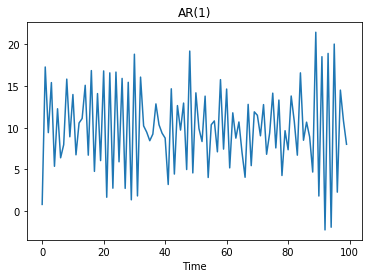

In [41]:
plt.plot(ar_one)
plt.title("AR(1)")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

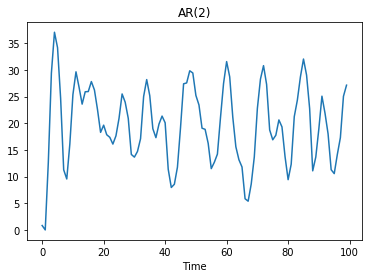

In [42]:
plt.plot(ar_two)
plt.title("AR(2)")
plt.xlabel("Time")

For an AR(1) model:
i.e. $$y_t = c + \phi_1y_{t-1} +  \epsilon_t,$$

- when $\phi_1 = 0 , y_t$ is equivalent to white noise
- when $\phi_1 = 1$ and $c = 0, y_t$ is equivalent to random walk 
- when $\phi_1 = 1$ and $c \neq 0, y_t$ is equivalent to random walk with drift
- when $\phi_1 < 0$, $y_t$ tends to oscillate around the mean.



In [43]:
epsilon = pd.np.random.normal(0,1,100); c = 3 

Text(0.5, 0, 'Time')

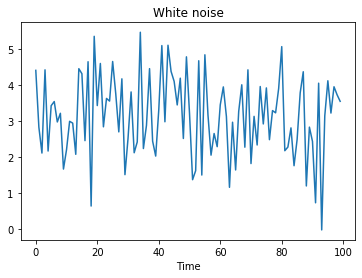

In [44]:
# white noise
# y = epsilon + c
y = epsilon+c
plt.plot(y)
plt.title("White noise");plt.xlabel("Time")

Text(0.5, 0, 'Time')

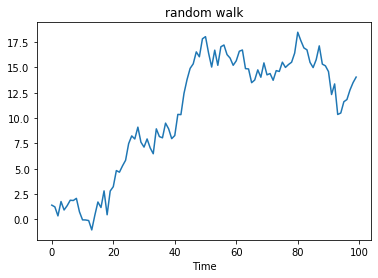

In [45]:
# random walk
# y = y{t-1}*1 + epsilon 
y = [epsilon[0]]
for e in epsilon[1:]:
    y.append(y[-1]*1+e)
plt.plot(y)
plt.title("random walk");plt.xlabel("Time")

Text(0.5, 0, 'Time')

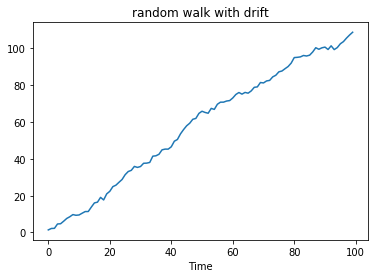

In [46]:
# random walk with drift
# y = y{t-1}*1 + epsilon + c 
c = pd.np.random.random() # drift term
y = [epsilon[0]]
for e in epsilon[1:]:
    y.append(y[-1]*1+e+c)
plt.plot(y)
plt.title("random walk with drift");plt.xlabel("Time")

Text(0.5, 0, 'Time')

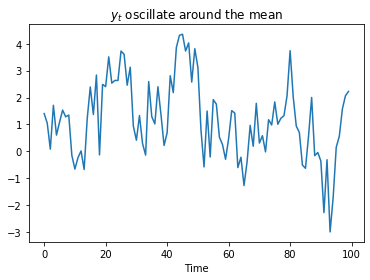

In [47]:
# yt oscillate around the mean
# y = y{t-1}*phi{1} + epsilon + c 
phi = 0.7
c = pd.np.random.random() # drift term
y = [epsilon[0]]
for e in epsilon[1:]:
    y.append(y[-1]*phi+e+c)
plt.plot(y)
plt.title("$y_t$ oscillate around the mean");plt.xlabel("Time")

### Constraint on paramters for AR(1) and AR(2) model
- for an AR(1) model: -1 < $\phi_1$ < 1.
- for an AR(2) model: -1 < $\phi2<1,\phi_1 + \phi_2 < 1, \phi_2 - \phi_1 < 1$

# 8.4 Moving avergae models
Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model

$$ y_t = c + \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + ... + 
\theta_q\epsilon_{t-q},$$
were $\epsilon_{t}$ is white noise. This is an __MA(q) model__ , a moving avergae model of order __q__.

Each value of $y_t$ can be thought of as a weighted moving average of the past few forecast errors. 
- moving average models $\neq$ moving average smoothing.
- moving average model is used for forecasting future values
- moving average smoothing is used for estimating the trend-cycle of past values.

Text(0.5, 0, 'Time')

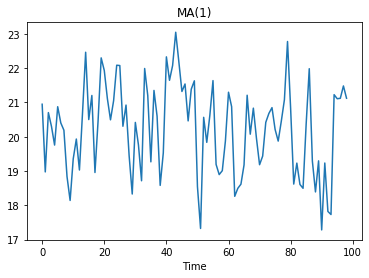

In [48]:
# MA(1) model:
## yt = 20 + epsilon{t} + 0.8epsilon(t-1)
y  = (20 + epsilon[1:] + 0.8*epsilon[:-1])
plt.plot(y)
plt.title("MA(1)");plt.xlabel("Time")

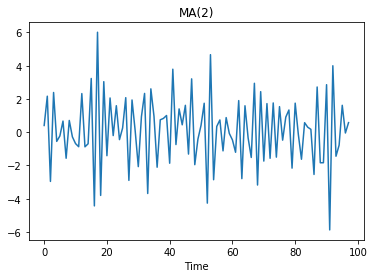

In [49]:
# MA(2) model:
## yt = epsilon{t} - epsilon(t-1) + 0.8*epsilon{t-2}
y  = (epsilon[2:] - epsilon[1:-1] + 0.8*epsilon[:-2] )
plt.plot(y)
plt.title("MA(2)");_= plt.xlabel("Time")

It is possible to write any stationary AR(p) model as an MA(∞) model. For example, using repeated substitution, we can demonstrate this for an AR(1) model:
    $$ y_t = \phi_1y_{t-1} + \epsilon_t \\ 
     = \phi_1(\phi_1y_{t-2} + \epsilon_{t-1} ) +\epsilon_t \\
     = \phi_1^2y_{t-2} + \phi_1\epsilon_{t-1}  +\epsilon_t \\
     = \phi_1^3y_{t-3} + \phi_1^2\epsilon_{t-2} + \phi_1\epsilon_{t-1}  +\epsilon_t \\
     etc.
     $$
     
Provided  -1 < $\phi_1$ < 1. , the value of  $\phi_1^k$   will get smaller as $k$ gets larger. So eventually we obtain
$$ y_t = \epsilon_t + \phi_1\epsilon_{t-1} +\phi_1^2\epsilon_{t-2} + \phi_1^3\epsilon_{t-3} + ... , $$
and MA(∞) process.

Similarly, an AM(1) process can be written as AR((∞) process under certain constraints. 

The invertibility constraints for other models are similar to the stationarity constraints.

- for an MA(1) model: $-1 < \phi_1 < 1.$
- for an MA(2) model: $-1 < \phi2<1,\phi_1 + \phi_2 > -1, \phi_1 - \phi_2 < 1.$

# 8.5 Non - seasonal ARMIMA models

non - seasonal ARIMA model = 
                            differencing
                        +   autoregssion model
                        +   moving average model.
                        
ARMIMA =   __AutoRegressive Integrated Moving Average__
“integration” is the reverse of differencing


$$ y_t^{'} = c + \phi_1y_{t-1}^{'} + ... + \phi_py_{t-p}^{'} + \theta_1\epsilon_{t-1} + ... + \theta_q\epsilon_{t-q} + \epsilon_{t} $$  

This is called __ARMIA (p,d,q) model__.
Where,
- p = order of the autoregressive part;
- d = degree of first differencing involved;
- q = order of the moving average part.

predictor on RHS include both lagged terms and lagged errors.

The same stationarity and invertibility conditions that are used for autoregressive and moving average models also apply to an ARIMA model

### Special cases of ARIMA models.

- White noise - ARIMA(0,0,0)
- Random walk - ARIMA(0,1,0) with no constant
- Random walk with drift - ARIMA(0,1,0) with a constant
- Autoregression -ARIMA(p,0,0)
- Moving average - ARIMA(0,0,q)

Whole game  is selecting values of __(p,d,q)__.

In [50]:
uschange = pd.read_csv("./data/uschange.csv")

uschange['date'] =  pd.date_range(start=pd.to_datetime("1970-1-1"),freq='Q',periods=len(uschange))

uschange.set_index("date",inplace=True)

[Text(0, 0.5, 'Quarterly percentage change'), Text(0.5, 0, 'year')]

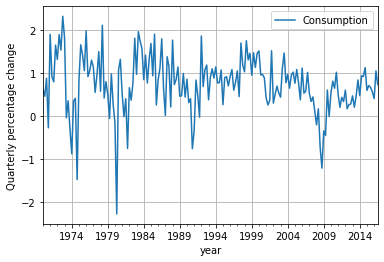

In [51]:
uschange[['Consumption']].plot(grid=True).set(ylabel="Quarterly percentage change",xlabel='year')

statsmodels.tsa.arima_model.ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
order = (1,0,3)
model = ARIMA(uschange['Consumption'], order, freq='Q')
fit = model.fit()

In [54]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  187
Model:                     ARMA(1, 3)   Log Likelihood                -164.807
Method:                       css-mle   S.D. of innovations              0.584
Date:                Sun, 16 Aug 2020   AIC                            341.613
Time:                        18:23:08   BIC                            361.000
Sample:                    03-31-1970   HQIC                           349.469
                         - 09-30-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7454      0.093      8.011      0.000       0.563       0.928
ar.L1.Consumption     0.5885      0.154      3.817      0.000       0.286       0.891
ma.L1.Consumption    -0.3528      0.166     -2.128      0.033      -0.678      -0.028
ma.L2.Consumption     0.0846      0.082      1.033      0.301      -0.076       0.245
ma.L3.Consumption     0.1739      0.084      2.062      0.039       0.009       0.339
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6991           +0.0000j            1.6991            0.0000
MA.1            0.9410           -1.2421j            1.5583           -0.1468
MA.2            0.9410           +1.2421j            1.5583            0.1468
MA.3           -2.3683           -0.0000j            2.3683           -0.5000
-----------------------------------------------------------------------------
"""

[Text(0.5, 0, 'residuals'), Text(0.5, 1.0, 'ARIMA Model')]

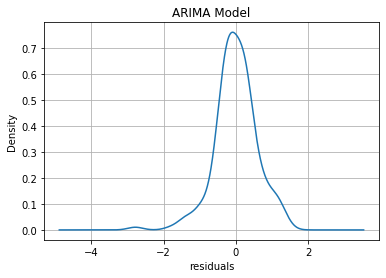

In [55]:
pd.Series(fit.resid,name='residuals').plot(kind='kde',grid=True).set(title='ARIMA Model',
                                                                    xlabel='residuals')

In [56]:
print("sigma**2 :{:.2f}".format(fit.sigma2))
print("standard deviation of white nosie (epsilon)",end=":")
print ("{:.2f}".format(pd.np.sqrt(fit.sigma2)))

sigma**2 :0.34
standard deviation of white nosie (epsilon):0.58


### DOUBT:
- c = 0.745 X (1 - 0.589) = 0.307
- c $\neq$ 0 and d = 0, long-term forecasts will go the mean of the data  

## Understanding ARIMA models
The constant  c has an important effect on the long-term forecasts obtained from these models
- if c = 0 and d = 0, the long-term forecasts will go to zero.
- if c = 0 and d = 1, the long-term forecasts will go to a non-zero constant.
- if c = 0 and d = 2, the long-term forecasts will follow a straight line.
- if c $\neq$ 0 and d = 0, the long-term forecasts will go to the mean of the data.
- if c $\neq$ 0 and d = 1, the long-term forecasts will follow a straight line.
- if c $\neq$ 0 and d = 2, the long-term forecasts will follow a quadratic trend.

The value of __d__ also has an __effect on the prediction intervals__ — the higher the value of d , the more rapidly the prediction intervals increase in size. For  d = 0 , the long-term forecast standard deviation will go to the standard deviation of the historical data, so the prediction intervals will all be essentially the same.

The value of  p is important if the data show cycles. To obtain cyclic forecasts, it is necessary to have  p ≥ 2 , along with some additional conditions on the parameters.

In [57]:
import statsmodels.api as sm

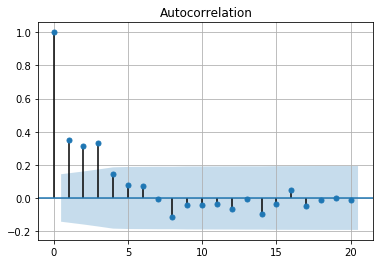

In [58]:
ax = plt.gca()
sm.graphics.tsa.plot_acf(uschange['Consumption'].values.squeeze(),lags=20,ax=ax);
ax.grid(True)

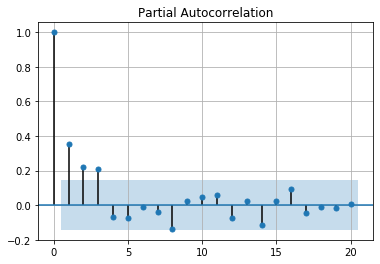

In [59]:
ax = plt.gca()
sm.graphics.tsa.plot_pacf(uschange['Consumption'].values.squeeze(),lags=20,ax=ax);
ax.grid(True)

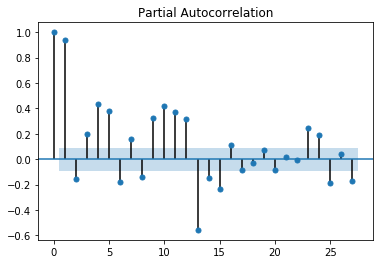

In [60]:
sm.graphics.tsa.plot_pacf(usmelec['value']);

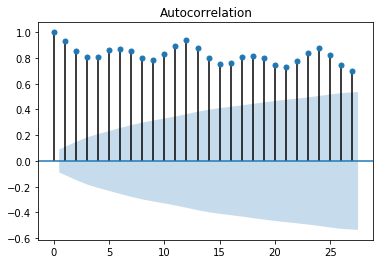

In [61]:
sm.graphics.tsa.plot_acf(usmelec['value']);

__partial auto -correlation__ tries to remove the effect of 
lags and tries to converse only any new information contained
 in lagged values that could be used for forecast.

# pointers to interpret ACF and PACF Plots
If the data are from an ARIMA(p,d,0) or ARIMA(0,d, q) model, then the ACF and PACF plots can be helpful in determining the value of p or  q.  If p  and  q are both positive, then the plots do not help in finding suitable values of p and  q.

The data may follow an ARIMA(p,d,0) model if the ACF and PACF plots of the differenced data show the following patterns:
- the ACF is exponentially decaying or sinusoidal;
- there is a significant spike at lag  pin the PACF, but none beyond lag p.

The data may follow an ARIMA(0, d, q) model if the ACF and PACF plots of the differenced data show the following patterns:

- the PACF is exponentially decaying or sinusoidal;
- there is a significant spike at lag  q in the ACF, but none beyond lag  q.

In [62]:
# AR(3) process as PACF drops after 3 lags
order = (3,0,0)
model = ARIMA(uschange['Consumption'], order, freq='Q')
fit = model.fit();fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  187
Model:                     ARMA(3, 0)   Log Likelihood                -165.170
Method:                       css-mle   S.D. of innovations              0.585
Date:                Sun, 16 Aug 2020   AIC                            340.340
Time:                        18:23:09   BIC                            356.495
Sample:                    03-31-1970   HQIC                           346.886
                         - 09-30-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7449      0.103      7.240      0.000       0.543       0.947
ar.L1.Consumption     0.2274      0.071      3.190      0.001       0.088       0.367
ar.L2.Consumption     0.1604      0.072      2.220      0.026       0.019       0.302
ar.L3.Consumption     0.2027      0.071      2.848      0.004       0.063       0.342
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2927           -0.0000j            1.2927           -0.0000
AR.2           -1.0421           -1.6524j            1.9536           -0.3395
AR.3           -1.0421           +1.6524j            1.9536            0.3395
-----------------------------------------------------------------------------
"""

# 8.6 Estimation and Order Selection

## Maximum likelihood estimation (MLE)

Once model (order) has been identified (i.e. values of p,d,q), we need to estimate the parameters c ,$\phi_1$,...,$\phi_p$,$\theta_1$,...,$\theta_q$.
This technique finds the values of the parameters which maximise the probability of obtaining the data that we have observed. For ARIMA models, MLE is similar to the least squares estimates that would be obtained by minimising
$$ \Sigma_{t-1}^{T}\epsilon_t^2$$

## Statsmodel (cost function) 
This is the loglikelihood to maximize. 
- If “css-mle”, the conditional sum of squares likelihood is maximized and its values are used as starting values for the computation of the exact likelihood via the Kalman filter. 
- If “mle”, the exact likelihood is maximized via the Kalman Filter. 
- If “css” the conditional sum of squares likelihood is maximized.

Refer: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.fit.html#statsmodels.tsa.arima_model.ARIMA.fit

## Information Criteria

AIC, AICc , BIC are not comprable when __d__ of ARIMA model has to be idenfitied. But these 
can be used to identify the model with most suitable p,q i.e. the model with least AIC/BIC.
AICc is correction mostly valid for small smaple correction. 

Stastsmodel ARMIA fit, returns aic ( not AICc)

In [63]:
import statsmodels
statsmodels.tools.eval_measures.aic??

Signature: statsmodels.tools.eval_measures.aic(llf, nobs, df_modelwc)
Source:   
def aic(llf, nobs, df_modelwc):
    """Akaike information criterion

    Parameters
    ----------
    llf : float
        value of the loglikelihood
    nobs : int
        number of observations
    df_modelwc : int
        number of parameters including constant

    Returns
    -------
    aic : float
        information criterion

    References
    ----------
    https://en.wikipedia.org/wiki/Akaike_information_criterion
    """
    return -2. * llf + 2. * df_modelwc
File:      c:\users\91882\anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py
Type:      function


In [64]:
statsmodels.tools.eval_measures.aicc??

Signature: statsmodels.tools.eval_measures.aicc(llf, nobs, df_modelwc)
Source:   
def aicc(llf, nobs, df_modelwc):
    """Akaike information criterion (AIC) with small sample correction

    Parameters
    ----------
    llf : float
        value of the loglikelihood
    nobs : int
        number of observations
    df_modelwc : int
        number of parameters including constant

    Returns
    -------
    aicc : float
        information criterion

    References
    ----------
    https://en.wikipedia.org/wiki/Akaike_information_criterion#AICc
    """
    return -2. * llf + 2. * df_modelwc * nobs / (nobs - df_modelwc - 1.)
File:      c:\users\91882\anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py
Type:      function


# SARIMA

In [65]:
euretail  = pd.read_csv("./data/euretail.csv")

In [66]:
euretail['year'] = euretail.time.astype(int)
euretail['qtr'] = euretail.time -euretail.time.astype(int)

euretail.loc[euretail.qtr==0,'qtr'] = 3
euretail.loc[euretail.qtr==0.25,'qtr'] = 6
euretail.loc[euretail.qtr==0.50,'qtr'] = 9
euretail.loc[euretail.qtr==0.75,'qtr'] = 12

euretail['date'] = pd.to_datetime(euretail['year'].astype(str) + "-" + euretail['qtr'].astype(int).astype(str),format='%Y-%m')

In [67]:
euretail.set_index('date',inplace=True)

In [68]:
euretail = euretail[['value']]
euretail['seasonal_diff'] = euretail['value'].diff(4)
euretail['second_diff'] = euretail['value'].diff()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DB592E9B0>,
      dtype=object)

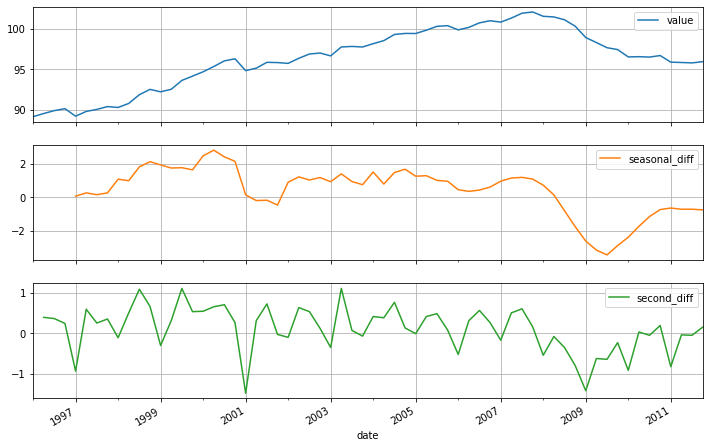

In [69]:
euretail.plot(subplots=True,grid=True,figsize=(12,8))

In [70]:
model = sm.tsa.statespace.SARIMAX(endog=euretail['value'],order=(0,1,3),seasonal_order=(0,1,1,4))
sarima = model.fit()

C:\Users\91882\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\Users\91882\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


In [71]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               value   No. Observations:                   64
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 4)   Log Likelihood                 -28.632
Date:                             Sun, 16 Aug 2020   AIC                             67.263
Time:                                     18:23:10   BIC                             77.651
Sample:                                 03-01-1996   HQIC                            71.318
                                      - 12-01-2011                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2630      0.128      2.056      0.040       0.012       0.514
ma.L2          0.3694      0.113      3.260      0.001       0.147       0.592
ma.L3          0.4200      0.128      3.286      0.001       0.169       0.671
ma.S.L4       -0.6635      0.159     -4.184      0.000      -0.974      -0.353
sigma2         0.1447      0.029      5.005      0.000       0.088       0.201
===================================================================================
Ljung-Box (Q):                       17.47   Jarque-Bera (JB):                 0.48
Prob(Q):                              1.00   Prob(JB):                         0.79
Heteroskedasticity (H):               0.55   Skew:                             0.16
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
def plot_acf_pacf(series):
    f , ax = plt.subplots(2,1,figsize=(7,8))
    sm.graphics.tsa.plot_acf(series,ax=ax[0])
    sm.graphics.tsa.plot_pacf(series,ax=ax[1])
    return f

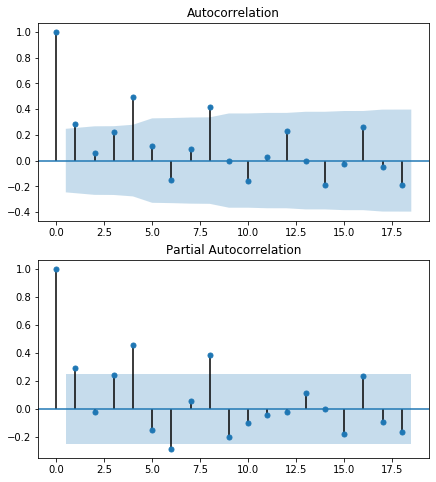

In [73]:
plot_acf_pacf(euretail['value'].diff().dropna());

The aim of the arima model is to model the series as a stationary series.
Sarima model in addition to arima model adds seasonal error components to the model.

We can get away with ARIMA model if we staisfy these two conditions:
 - We have enough data to estimate a large number of coefficients
 - We are willing to assume a really complicated error structure

Seasonality can come in two basic varieties, multiplicative and additive. By __default statsmodels works with a multiplicative seasonal components.__